In [4]:
import os
import librosa
import numpy as np
import pandas as pd

# Path to audio files
audio_folder_path = r'AudioWAV'

# Prepare list to hold features and labels
features_list = []
emotions = []

# Define a dictionary for mapping emotion codes to full labels
emotion_dict = {
    'ANG': 'Anger',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}

# Loop through each audio file in the folder
for filename in os.listdir(audio_folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_folder_path, filename)
        
        # Load audio
        y, sr = librosa.load(file_path)
        
        # Define 20ms window size
        window_size_ms = 0.02  # 20ms
        frame_length = int(window_size_ms * sr)  # Samples for 20ms window
        hop_length = frame_length // 2  # 50% overlap
        
        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
        
        # Extract delta and delta-delta MFCC
        delta_mfcc = librosa.feature.delta(mfcc)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        
        # Calculate statistics for MFCC, delta-MFCC, and delta-delta-MFCC
        mfcc_features = np.concatenate([
            np.mean(mfcc, axis=1), np.std(mfcc, axis=1)
        ])
        delta_mfcc_features = np.concatenate([
            np.mean(delta_mfcc, axis=1), np.std(delta_mfcc, axis=1)
        ])
        delta2_mfcc_features = np.concatenate([
            np.mean(delta2_mfcc, axis=1), np.std(delta2_mfcc, axis=1)
        ])
        
        # Combine all features
        features = np.concatenate([mfcc_features, delta_mfcc_features, delta2_mfcc_features])
        features_list.append(features)
        
        # Extract emotion labels from filename
        parts = filename.split('_')
        emotion_code = parts[2]  # Emotion code (e.g., ANG, DIS)
        
        # Map emotion code to full emotion label
        emotion_label = emotion_dict.get(emotion_code, "Unknown")
        emotions.append(emotion_label)

# Define column names for DataFrame
columns = []
columns += [f'mfcc_mean_{i}' for i in range(13)] + [f'mfcc_std_{i}' for i in range(13)]
columns += [f'delta_mfcc_mean_{i}' for i in range(13)] + [f'delta_mfcc_std_{i}' for i in range(13)]
columns += [f'delta2_mfcc_mean_{i}' for i in range(13)] + [f'delta2_mfcc_std_{i}' for i in range(13)]

# Create DataFrame with features and labels
df = pd.DataFrame(features_list, columns=columns)
df['emotion'] = emotions  # Add emotion labels

# Save to CSV
df.to_csv('audio_features_without_filtering.csv', index=False)
print("Features with labels have been extracted and saved to 'audio_features_without_filtering.csv'")


Features with labels have been extracted and saved to 'audio_features_without_filtering.csv'


In [5]:
df

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,delta2_mfcc_std_4,delta2_mfcc_std_5,delta2_mfcc_std_6,delta2_mfcc_std_7,delta2_mfcc_std_8,delta2_mfcc_std_9,delta2_mfcc_std_10,delta2_mfcc_std_11,delta2_mfcc_std_12,emotion
0,-508.958221,118.634850,-3.356938,40.970490,3.092985,15.026861,-17.768225,-5.002903,-11.964508,-2.992107,...,1.868941,1.050583,1.215996,1.395098,1.106331,0.931807,1.114635,0.931815,1.174189,Anger
1,-556.846436,129.902359,-12.017045,52.574577,5.240597,24.657318,-22.256861,5.648675,-12.966894,-2.986880,...,1.694662,1.328769,1.243354,1.272423,0.964516,0.959910,1.023868,1.036770,1.011040,Disgust
2,-512.270203,106.605949,4.481588,33.221615,10.252077,11.566595,-15.322458,-2.085884,-8.047853,-5.309411,...,1.737946,1.255807,1.169335,1.337092,0.984128,0.957654,0.902779,0.929083,0.755707,Fear
3,-507.348145,120.728325,-9.146874,42.703300,7.847486,13.112681,-21.243057,-0.663292,-12.059789,-8.139682,...,1.628116,1.237468,1.284604,1.347286,1.266892,1.093934,1.267915,0.997715,1.104413,Happy
4,-538.608521,123.066727,-0.616906,40.799046,10.415956,14.509365,-13.737962,-3.017843,-11.575838,-6.111917,...,1.529162,1.156719,1.291078,1.373941,1.104398,1.017255,1.232664,1.270499,0.978076,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-622.698975,127.347733,16.230566,54.328545,-11.143003,42.037441,-17.240387,12.382068,-12.402145,5.875704,...,1.516225,1.382194,1.144804,1.143540,1.030847,0.981285,0.950538,0.969847,1.156949,Disgust
7438,-633.114319,123.366188,16.944687,59.779652,-8.737967,43.901775,-17.874491,11.103239,-9.550373,5.951777,...,1.328429,1.144373,1.054839,1.203048,0.943828,0.941787,1.028106,0.868207,1.089416,Fear
7439,-581.527649,122.734200,12.707020,53.749996,-9.003664,29.595526,-20.057114,9.435844,-12.970961,5.856920,...,1.310597,1.508141,1.530938,1.222890,1.369629,1.065622,1.064884,0.956855,0.909332,Happy
7440,-598.897339,119.986755,23.080889,45.074135,-11.070362,30.927126,-11.557021,7.765402,-10.457714,6.325374,...,1.805060,1.358548,1.153678,1.357628,1.106659,0.998317,1.261371,0.988496,1.027129,Neutral


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from CSV file
file_path = 'audio_features_with_Newlabels.csv'  # Replace with your actual file name if different
data = pd.read_csv(file_path)

# Define features (X) and target (y) columns
X = data.drop(columns=['emotion'])  # Drop the target column to get features
y = data['emotion']  # Define the target column

# Split the data into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Combine X and y for each set and save them back to CSV
train_data = pd.concat([X_train, y_train], axis=1)  # Corrected variable name
test_data = pd.concat([X_test, y_test], axis=1)

# Save to new CSV files
train_data.to_csv('training_dataNew.csv', index=False)  # Save training data
test_data.to_csv('test_dataNew.csv', index=False)      # Save test data

print("Training and test data have been saved to 'training_dataNew.csv' and 'test_dataNew.csv'.")


Training and test data have been saved to 'training_dataNew.csv' and 'test_dataNew.csv'.


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# Load train and test data
train_csv = r'training_dataNew.csv'
test_csv = r'test_dataNew.csv'

# Load features and labels from train data
train_df = pd.read_csv(train_csv).drop(columns=['intensity'], errors='ignore')  # Drop 'intensity' if exists
test_df = pd.read_csv(test_csv).drop(columns=['intensity'], errors='ignore')

# Extract features and labels
X_train = train_df.drop(columns=['emotion']).values  # Drop 'emotion' column to get features
Y_train = train_df['emotion'].values  # Get labels
X_test = test_df.drop(columns=['emotion']).values if 'emotion' in test_df.columns else test_df.values

# Impute missing values with the mean for both train and test sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Perform feature selection using Random Forest importance
rf_feature_selector = RandomForestClassifier(n_estimators=800, random_state=42)
rf_feature_selector.fit(X_train, Y_train)

# Get feature importances
importances = rf_feature_selector.feature_importances_

# Use SelectFromModel to select top features
selector = SelectFromModel(rf_feature_selector, prefit=True, threshold='median')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Step 2: Cross-validation with selected features
def cross_validate(X, y):
    model = RandomForestClassifier(n_estimators=800, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Score:", scores.mean())

# Cross-validate with reduced feature set
print("Cross-validating with reduced feature set...")
cross_validate(X_train_selected, Y_train)

# Step 3: Train and predict with reduced features
rf = RandomForestClassifier(n_estimators=800, random_state=42)
rf.fit(X_train_selected, Y_train)
y_test_rf = rf.predict(X_test_selected)

# Save predictions with IDs if available, else use index
if 'new_id' in test_df.columns:
    test_df['emotion'] = y_test_rf  # Add predictions
    output_df = test_df[['new_id', 'emotion']].rename(columns={"new_id": "id"})
else:
    output_df = pd.DataFrame({'id': test_df.index, 'emotion': y_test_rf})

output_df.to_csv(r'C:\Users\rakes\Desktop\Machinelearn\predict_rf_final.csv', index=False)
print("Predictions saved to 'predict_rf_final.csv'")


Cross-validating with reduced feature set...
Cross-Validation Scores: [0.50298507 0.54552239 0.53472741 0.51232263 0.53323376]
Mean Cross-Validation Score: 0.5257582513125187
Predictions saved to 'predict_rf_final.csv'


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load train and test data
train_csv = r'training_dataNew.csv'  # Replace with actual path
test_csv = r'test_dataNew.csv'  # Replace with actual path

# Load datasets
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Separate features (X) and labels (y)
X_train = train_df.drop(columns=['emotion']).values
y_train = train_df['emotion'].values
X_test = test_df.drop(columns=['emotion']).values
y_test = test_df['emotion'].values

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
print("Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Train XGBoost Classifier
print("Training XGBoost classifier...")
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Model
print("Making predictions on test data...")
y_pred = xgb_model.predict(X_test)

# Decode predicted labels back to original categories
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_decoded))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))

accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"\nAccuracy: {accuracy:.4f}")

# Save Predictions
output_df = pd.DataFrame({'id': test_df.index, 'emotion': y_pred_decoded})
output_file = r'predict_xgb_final.csv'  # Replace with desired output path
output_df.to_csv(output_file, index=False)
print(f"Predictions saved to {output_file}")


Applying SMOTE for class balancing...
Training XGBoost classifier...
Making predictions on test data...

Classification Report:
              precision    recall  f1-score   support

       Anger       0.69      0.79      0.74       127
     Disgust       0.54      0.46      0.50       127
        Fear       0.51      0.41      0.46       127
       Happy       0.54      0.48      0.51       128
     Neutral       0.55      0.68      0.61       109
         Sad       0.57      0.65      0.60       127

    accuracy                           0.57       745
   macro avg       0.57      0.58      0.57       745
weighted avg       0.57      0.57      0.57       745


Confusion Matrix:
[[100   6   5  14   1   1]
 [ 14  58   8  13  13  21]
 [  8   9  52  15  12  31]
 [ 19  14  16  61  18   0]
 [  3   8   4  10  74  10]
 [  1  12  16   0  16  82]]

Accuracy: 0.5732
Predictions saved to predict_xgb_final.csv


In [9]:
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Path to audio files
audio_folder_path = r'AudioWAV'

# Prepare lists to hold features and labels
features_list = []
emotions = []
intensities = []

# Define a dictionary for mapping emotion codes to full labels
emotion_dict = {
    'ANG': 'Anger',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}

# Loop through each audio file in the folder
for filename in os.listdir(audio_folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_folder_path, filename)
        
        # Load audio
        y, sr = librosa.load(file_path)
        
        # Define 20ms window size
        window_size_ms = 0.02  # 20ms
        frame_length = int(window_size_ms * sr)  # Samples for 20ms window
        hop_length = frame_length // 2  # 50% overlap
        
        # Extract MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
        delta_mfcc = librosa.feature.delta(mfcc)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)

        # Root Mean Square Energy (RMSE)
        rmse = librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)

        # Chroma STFT
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)

        # Spectral features
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        
        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length, frame_length=frame_length)

        # Calculate statistics for all features
        def compute_statistics(feature):
            return [
                np.mean(feature), np.median(feature), np.std(feature),
                skew(feature, axis=1)[0] if feature.ndim > 1 else skew(feature),
                kurtosis(feature, axis=1)[0] if feature.ndim > 1 else kurtosis(feature)
            ]

        mfcc_features = np.concatenate([np.mean(mfcc, axis=1), np.std(mfcc, axis=1)])
        delta_mfcc_features = np.concatenate([np.mean(delta_mfcc, axis=1), np.std(delta_mfcc, axis=1)])
        delta2_mfcc_features = np.concatenate([np.mean(delta2_mfcc, axis=1), np.std(delta2_mfcc, axis=1)])
        
        rmse_features = compute_statistics(rmse)
        chroma_features = compute_statistics(chroma)
        spec_cent_features = compute_statistics(spec_cent)
        spec_bw_features = compute_statistics(spec_bw)
        rolloff_features = compute_statistics(rolloff)
        zcr_features = compute_statistics(zcr)
        
        # Combine all features
        combined_features = np.concatenate([
            mfcc_features, delta_mfcc_features, delta2_mfcc_features,
            rmse_features, chroma_features, spec_cent_features,
            spec_bw_features, rolloff_features, zcr_features
        ])
        
        features_list.append(combined_features)
        
        # Extract emotion and intensity labels from filename
        parts = filename.split('_')
        emotion_code = parts[2]  # Emotion code (e.g., ANG, DIS)
        intensity_code = parts[3].split('.')[0]  # Intensity code (e.g., LO, MD, HI, XX)
        
        # Map emotion code to full emotion label
        emotion_label = emotion_dict.get(emotion_code, "Unknown")
        emotions.append(emotion_label)
        intensities.append(intensity_code)

# Define column names for DataFrame
mfcc_columns = [f'mfcc_mean_{i}' for i in range(13)] + [f'mfcc_std_{i}' for i in range(13)]
delta_columns = [f'delta_mfcc_mean_{i}' for i in range(13)] + [f'delta_mfcc_std_{i}' for i in range(13)]
delta2_columns = [f'delta2_mfcc_mean_{i}' for i in range(13)] + [f'delta2_mfcc_std_{i}' for i in range(13)]

other_columns = ['rmse_mean', 'rmse_median', 'rmse_std', 'rmse_skew', 'rmse_kurtosis',
                 'chroma_mean', 'chroma_median', 'chroma_std', 'chroma_skew', 'chroma_kurtosis',
                 'spec_cent_mean', 'spec_cent_median', 'spec_cent_std', 'spec_cent_skew', 'spec_cent_kurtosis',
                 'spec_bw_mean', 'spec_bw_median', 'spec_bw_std', 'spec_bw_skew', 'spec_bw_kurtosis',
                 'rolloff_mean', 'rolloff_median', 'rolloff_std', 'rolloff_skew', 'rolloff_kurtosis',
                 'zcr_mean', 'zcr_median', 'zcr_std', 'zcr_skew', 'zcr_kurtosis']

columns = mfcc_columns + delta_columns + delta2_columns + other_columns

# Create DataFrame with features and labels
df = pd.DataFrame(features_list, columns=columns)
df['emotion'] = emotions
df['intensity'] = intensities

# Save to CSV
df.to_csv('audio_features_full.csv', index=False)
print("Features with labels have been extracted and saved to 'audio_features_full.csv'")


c:\Users\rakes\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Features with labels have been extracted and saved to 'audio_features_full.csv'


In [10]:
df

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,rolloff_std,rolloff_skew,rolloff_kurtosis,zcr_mean,zcr_median,zcr_std,zcr_skew,zcr_kurtosis,emotion,intensity
0,-508.958221,118.634850,-3.356938,40.970490,3.092985,15.026861,-17.768225,-5.002903,-11.964508,-2.992107,...,1430.229371,1.360511,1.991468,0.081890,0.054422,0.072589,2.299578,6.645787,Anger,XX
1,-556.846436,129.902359,-12.017045,52.574577,5.240597,24.657318,-22.256861,5.648675,-12.966894,-2.986880,...,1092.916946,1.912992,4.257648,0.069204,0.043084,0.065080,2.643668,8.909312,Disgust,XX
2,-512.270203,106.605949,4.481588,33.221615,10.252077,11.566595,-15.322458,-2.085884,-8.047853,-5.309411,...,1052.000716,1.923272,4.836269,0.063076,0.045351,0.060920,3.887165,20.468857,Fear,XX
3,-507.348145,120.728325,-9.146874,42.703300,7.847486,13.112681,-21.243057,-0.663292,-12.059789,-8.139682,...,944.304302,2.283025,6.636992,0.064288,0.047619,0.055172,3.514664,17.040351,Happy,XX
4,-538.608521,123.066727,-0.616906,40.799046,10.415956,14.509365,-13.737962,-3.017843,-11.575838,-6.111917,...,1133.006351,1.365052,2.168183,0.061943,0.047619,0.047844,2.581000,9.024194,Neutral,XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-622.698975,127.347733,16.230566,54.328545,-11.143003,42.037441,-17.240387,12.382068,-12.402145,5.875704,...,2128.241880,1.062553,-0.351911,0.089727,0.034014,0.123593,2.266920,4.337777,Disgust,XX
7438,-633.114319,123.366188,16.944687,59.779652,-8.737967,43.901775,-17.874491,11.103239,-9.550373,5.951777,...,1818.113642,1.070912,0.081675,0.072743,0.031746,0.116360,2.707954,6.087350,Fear,XX
7439,-581.527649,122.734200,12.707020,53.749996,-9.003664,29.595526,-20.057114,9.435844,-12.970961,5.856920,...,2168.918438,0.962674,-0.550561,0.102956,0.040816,0.143341,1.976842,2.450368,Happy,XX
7440,-598.897339,119.986755,23.080889,45.074135,-11.070362,30.927126,-11.557021,7.765402,-10.457714,6.325374,...,2020.076060,0.869129,-0.533819,0.085811,0.038549,0.113420,2.195525,3.878168,Neutral,XX


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from CSV file
file_path = 'audio_features_full.csv'  # Replace with your actual file name if different
data = pd.read_csv(file_path)

# Define features (X) and target (y) columns
X = data.drop(columns=['emotion'])  # Drop the target column to get features
y = data['emotion']  # Define the target column

# Split the data into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Combine X and y for each set and save them back to CSV
train_data = pd.concat([X_train, y_train], axis=1)  # Corrected variable name
test_data = pd.concat([X_test, y_test], axis=1)

# Save to new CSV files
train_data.to_csv('t.csv', index=False)  # Save training data
test_data.to_csv('te.csv', index=False)      # Save test data

print("Training and test data have been saved to 'training_dataNew.csv' and 'test_dataNew.csv'.")


Training and test data have been saved to 'training_dataNew.csv' and 'test_dataNew.csv'.


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the train and test CSV files with extracted features
train_df = pd.read_csv('t.csv')
test_df = pd.read_csv('te.csv')

# Drop the 'intensity' column if it exists
if 'intensity' in train_df.columns:
    train_df = train_df.drop(columns=['intensity'])

if 'intensity' in test_df.columns:
    test_df = test_df.drop(columns=['intensity'])

# Separate features and labels, assuming 'emotion' is the target label
if 'emotion' in train_df.columns:
    y_train = train_df['emotion'].reset_index(drop=True)
    train_features = train_df.drop(columns=['emotion']).reset_index(drop=True)
else:
    train_features = train_df.reset_index(drop=True)

if 'emotion' in test_df.columns:
    y_test = test_df['emotion'].reset_index(drop=True)
    test_features = test_df.drop(columns=['emotion']).reset_index(drop=True)
else:
    test_features = test_df.reset_index(drop=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
train_features = pd.DataFrame(imputer.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(imputer.transform(test_features), columns=test_features.columns)

# Standardize the features
scaler = StandardScaler(with_mean=False)
train_features = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)

# Apply PCA to retain 95% of the explained variance
pca = PCA(n_components=0.95)
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

# Convert PCA-transformed features back to DataFrame and reset index
train_features_pca_df = pd.DataFrame(train_features_pca).reset_index(drop=True)
test_features_pca_df = pd.DataFrame(test_features_pca).reset_index(drop=True)

# Add 'emotion' labels back to the transformed data if they were present
if 'emotion' in train_df.columns:
    train_features_pca_df['emotion'] = y_train
    test_features_pca_df['emotion'] = y_test

# Save PCA-transformed data back to CSV
train_features_pca_df.to_csv('t_pca1.csv', index=False)
test_features_pca_df.to_csv('t_pca2.csv', index=False)

# Print the number of PCA components retained
print("PCA transformation complete.")
print("Number of PCA components retained for training:", pca.n_components_)
print("Training features shape after PCA:", train_features_pca_df.shape)
print("Testing features shape after PCA:", test_features_pca_df.shape)
print("Explained variance by selected components:", np.sum(pca.explained_variance_ratio_))


PCA transformation complete.
Number of PCA components retained for training: 56
Training features shape after PCA: (6697, 57)
Testing features shape after PCA: (745, 57)
Explained variance by selected components: 0.9519302451505386


In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Load PCA-transformed train and test data
X_train = pd.read_csv(r't_pca1.csv')
X_test = pd.read_csv(r't_pca2.csv')

# Separate target labels from features in training data
Y_train = X_train['emotion']
X_train = X_train.drop(columns=['emotion'], errors='ignore')  # Ensure only features in X_train
X_test = X_test.drop(columns=['emotion'], errors='ignore')    # Ensure only features in X_test

# Function to perform cross-validation
def cross_validate(X_train, Y_train, model_type="svm"):
    model = SVC() if model_type == "svm" else RandomForestClassifier(n_estimators=800)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores ({model_type}):", scores)
    print(f"Mean Cross-Validation Score ({model_type}): {scores.mean()}")

# SVM classifier function
def svm_classifier(X_train, Y_train, X_test):
    svm = SVC()
    svm.fit(X_train, Y_train)
    return svm.predict(X_test)

# Perform cross-validation on PCA features
cross_validate(X_train, Y_train, model_type="svm")

# Classify PCA test features using the SVM classifier
y_test_svm = svm_classifier(X_train, Y_train, X_test)

# Save predictions
test_df = pd.DataFrame(X_test)  # Initialize with X_test to get correct row count
test_df['emotion'] = y_test_svm  # Add predictions
test_df.to_csv(r'C:\Users\rakes\Desktop\Machinelearn\predict_svm.csv', index=False)

print("Predictions saved to 'predict_svm.csv'")


Cross-Validation Scores (svm): [0.5        0.52313433 0.51605676 0.51605676 0.52949963]
Mean Cross-Validation Score (svm): 0.516949494499125
Predictions saved to 'predict_svm.csv'


Classification Report:
              precision    recall  f1-score   support

       Anger       0.68      0.82      0.74       127
     Disgust       0.51      0.39      0.44       127
        Fear       0.52      0.36      0.43       127
       Happy       0.56      0.53      0.54       128
     Neutral       0.45      0.51      0.48       109
         Sad       0.55      0.69      0.61       127

    accuracy                           0.55       745
   macro avg       0.54      0.55      0.54       745
weighted avg       0.55      0.55      0.54       745

Accuracy Score: 0.5516778523489932


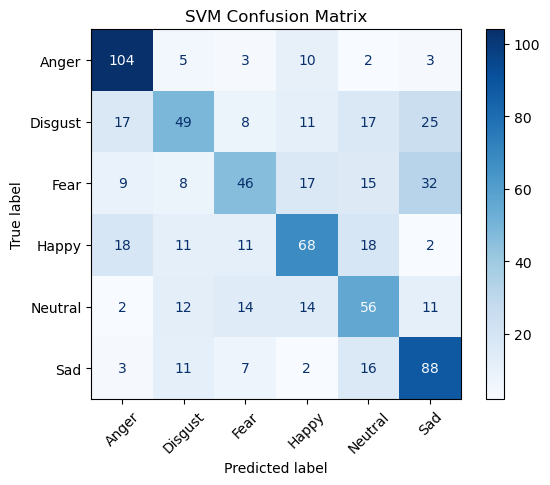

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels for your test set in a variable y_test
# Load the true labels for the test set from the original test data if available
# y_test = pd.read_csv(r'C:\Users\rakes\Desktop\Machinelearn\test_data_with_emotion_labels.csv')['emotion']  # Load actual labels

# Display the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_test_svm, target_names=['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))
print("Accuracy Score:", accuracy_score(y_test, y_test_svm))

# Plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, label_names, classifier="SVM"):
    confusion_mat = confusion_matrix(y_true, y_pred, labels=label_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{classifier} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# Define label names for the emotions
label_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Plot the confusion matrix using the true labels and predictions
plot_confusion_matrix(y_test, y_test_svm, label_names=label_names, classifier="SVM")
